<a href="https://colab.research.google.com/github/teamgaon/KIST/blob/main/220427_ji_Analytics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [222]:
import albumentations
import albumentations.pytorch
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
from tqdm import tqdm
from glob import glob
import os
import json
import torch
from torch import nn
from torchvision import models
from torch.utils.data import Dataset
from sklearn.metrics import f1_score
import albumentations as A
from sklearn.model_selection import KFold, StratifiedKFold
from datetime import datetime, timedelta
import random
import torchvision.transforms as transforms
import gc
from PIL import Image
from sklearn.preprocessing import MinMaxScaler

In [3]:
sample = pd.read_excel('/content/drive/MyDrive/KIST/red_lettuce/CASE10/dataset_20210809.xlsx')

In [199]:
train = glob('/content/drive/MyDrive/KIST/red_lettuce/*/*.xlsx')
train.sort()

In [200]:
train

['/content/drive/MyDrive/KIST/red_lettuce/CASE1/dataset_20210416.xlsx',
 '/content/drive/MyDrive/KIST/red_lettuce/CASE10/dataset_20210809.xlsx',
 '/content/drive/MyDrive/KIST/red_lettuce/CASE2/dataset_20210504.xlsx',
 '/content/drive/MyDrive/KIST/red_lettuce/CASE3/dataset_20210703.xlsx',
 '/content/drive/MyDrive/KIST/red_lettuce/CASE4/dataset_20210809.xlsx',
 '/content/drive/MyDrive/KIST/red_lettuce/CASE5/dataset_20210703.xlsx',
 '/content/drive/MyDrive/KIST/red_lettuce/CASE6/dataset_20210504.xlsx',
 '/content/drive/MyDrive/KIST/red_lettuce/CASE7/dataset_20210703.xlsx',
 '/content/drive/MyDrive/KIST/red_lettuce/CASE8/dataset_20210809.xlsx',
 '/content/drive/MyDrive/KIST/red_lettuce/CASE9/dataset_20210504.xlsx']

In [217]:
temp

,시간,내부온도관측치,내부습도관측치,CO2관측치,EC관측치,외부온도관측치,외부습도관측치,펌프상태,펌프작동남은시간,최근분무량,...,냉방온도,난방온도,기준온도,내외부온도차,난방부하,냉방부하,총추정광량,백색광추정광량,적색광추정광량,청색광추정광량
0,2021-04-16 00:00,26.9,35.200001,471.0,0.277890,16.100000,46.500000,NaN,NaN,0.0,...,16.0,14.0,15.0,NaN,0.0,54.499998,0.0,0.0,0.0,0.0
1,2021-04-16 00:01,26.9,35.200001,471.0,0.277890,16.100000,46.500000,0.0,0.0,0.0,...,16.0,14.0,15.0,10.799999,0.0,54.499998,0.0,0.0,0.0,0.0
2,2021-04-16 00:02,26.9,35.200001,465.0,0.278563,16.299999,46.400002,0.0,0.0,0.0,...,16.0,14.0,15.0,NaN,0.0,54.499998,0.0,0.0,0.0,0.0
3,2021-04-16 00:03,26.9,35.200001,469.0,0.277890,16.200001,46.299999,0.0,0.0,0.0,...,16.0,14.0,15.0,NaN,0.0,54.499998,0.0,0.0,0.0,0.0
4,2021-04-16 00:04,26.9,35.200001,467.0,0.277890,16.200001,46.299999,0.0,0.0,0.0,...,16.0,14.0,15.0,10.699999,0.0,54.499998,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57400,2021-05-25 23:55,22.4,68.000000,578.0,0.001783,17.000000,66.199997,NaN,NaN,126.0,...,16.0,14.0,15.0,NaN,0.0,31.999998,0.0,0.0,0.0,0.0
57401,2021-05-25 23:56,22.4,68.000000,581.0,0.001783,17.100000,66.199997,0.0,0.0,126.0,...,NaN,NaN,NaN,5.299999,NaN,NaN,NaN,NaN,NaN,NaN
57402,2021-05-25 23:57,22.4,68.000000,583.0,0.001783,17.200001,66.199997,0.0,0.0,126.0,...,16.0,14.0,15.0,NaN,0.0,31.999998,0.0,0.0,0.0,0.0
57403,2021-05-25 23:58,22.4,68.099998,575.0,0.001783,17.100000,66.099998,0.0,0.0,126.0,...,16.0,14.0,15.0,NaN,0.0,31.999998,0.0,0.0,0.0,0.0


0
1
2
3
4
5
6
7
8
9


In [258]:
temp = pd.read_excel(train[4])
temp.head()

,시간,내부온도관측치,내부습도관측치,CO2관측치,EC관측치,외부온도관측치,외부습도관측치,펌프상태,펌프작동남은시간,최근분무량,...,냉방온도,난방온도,기준온도,내외부온도차,난방부하,냉방부하,총추정광량,백색광추정광량,적색광추정광량,청색광추정광량
0,2021-08-09 09:40,24.400000,55.000000,584.0,0.0,24.000000,54.700001,0.0,0.0,0.0,...,26.0,25.0,25.5,-1.199999,0.000000,10.500002,215.3725,176.3637,26.4768,12.532
1,2021-08-09 09:41,24.299999,55.099998,586.0,0.0,24.100000,55.099998,NaN,NaN,0.0,...,26.0,25.0,25.5,NaN,11.900005,0.000000,0.0000,0.0000,0.0000,0.000
2,2021-08-09 09:42,24.400000,55.200001,578.0,0.0,24.000000,55.099998,0.0,0.0,0.0,...,26.0,25.0,25.5,NaN,11.200003,0.000000,0.0000,0.0000,0.0000,0.000
3,2021-08-09 09:43,24.299999,55.200001,578.0,0.0,24.100000,54.900002,0.0,0.0,0.0,...,26.0,25.0,25.5,0.199999,11.900005,0.000000,0.0000,0.0000,0.0000,0.000
4,2021-08-09 09:44,24.500000,55.299999,577.0,0.0,24.200001,55.099998,0.0,0.0,0.0,...,26.0,25.0,25.5,NaN,10.500000,0.000000,265.3480,216.5870,33.0960,15.665


In [253]:
temp = pd.read_excel(train[0])

temp['시간'] = pd.to_datetime(temp['시간'])
temp['년월일'] = temp['시간'].dt.year.astype(str) + '-' + temp['시간'].dt.month.astype(str) + '-' + temp['시간'].dt.day.astype(str)
temp['년월일'] = pd.to_datetime(temp['년월일'])
temp_mean = temp.groupby('년월일').mean()


temp_mean = temp_mean.reset_index(drop=True)
temp_mean['target'] = temp_mean.index


scaler = MinMaxScaler()
scaler.fit(temp_mean)
df = scaler.transform(temp_mean)
df = pd.DataFrame(df, columns=temp_mean.columns)


feature = ['내부온도관측치', '내부습도관측치', 'CO2관측치', '외부온도관측치', '외부습도관측치', '최근분무량',
       '일간누적분무량', '화이트 LED동작강도', '레드 LED동작강도', '블루 LED동작강도', '내외부온도차', '난방부하', '냉방부하',
       '총추정광량', '백색광추정광량', '적색광추정광량', '청색광추정광량','target']
df = df[feature]


idx = df[(df['화이트 LED동작강도']==0) | (df['레드 LED동작강도']==0) | (df['블루 LED동작강도']==0)].index
df.drop(idx , inplace=True)
df.dropna(inplace=True)

In [256]:
for i in range(1,len(train)):
  temp = pd.read_excel(train[i])

  temp['시간'] = pd.to_datetime(temp['시간'])
  temp['년월일'] = temp['시간'].dt.year.astype(str) + '-' + temp['시간'].dt.month.astype(str) + '-' + temp['시간'].dt.day.astype(str)
  temp['년월일'] = pd.to_datetime(temp['년월일'])
  temp_mean = temp.groupby('년월일').mean()


  temp_mean = temp_mean.reset_index(drop=True)
  temp_mean['target'] = temp_mean.index


  scaler = MinMaxScaler()
  scaler.fit(temp_mean)
  df_sam = scaler.transform(temp_mean)
  df_sam = pd.DataFrame(df_sam, columns=temp_mean.columns)


  feature = ['내부온도관측치', '내부습도관측치', 'CO2관측치', '외부온도관측치', '외부습도관측치', '최근분무량',
        '일간누적분무량', '화이트 LED동작강도', '레드 LED동작강도', '블루 LED동작강도', '내외부온도차', '난방부하', '냉방부하',
        '총추정광량', '백색광추정광량', '적색광추정광량', '청색광추정광량','target']
  df_sam = df_sam[feature]


  idx = df_sam[(df_sam['화이트 LED동작강도']==0) | (df_sam['레드 LED동작강도']==0) | (df_sam['블루 LED동작강도']==0)].index
  df_sam.drop(idx , inplace=True)
  df_sam.dropna(inplace=True)

  df = pd.concat([df, df_sam])

ParserError: ignored

In [249]:
df

,내부온도관측치,내부습도관측치,CO2관측치,외부온도관측치,외부습도관측치,최근분무량,일간누적분무량,화이트 LED동작강도,레드 LED동작강도,블루 LED동작강도,내외부온도차,난방부하,냉방부하,총추정광량,백색광추정광량,적색광추정광량,청색광추정광량,target
0,0.324143,0.076318,0.296703,0.000000,0.483444,0.896177,0.717680,0.855791,0.870670,0.797762,0.901651,0.85711,0.395318,0.852921,0.858656,0.872264,0.801542,0.000000
1,0.512063,0.017478,0.198588,0.188076,0.241492,0.873003,0.792618,0.996414,0.992256,0.990416,0.975879,0.00000,0.466369,0.998933,0.999305,0.996561,0.997229,0.025641
2,0.470331,0.000000,0.106364,0.122473,0.167146,0.906268,0.715531,0.997117,0.994194,0.993682,0.988041,0.00000,0.420781,0.998800,0.998931,0.997975,0.997856,0.051282
3,0.460843,0.043290,0.232362,0.099904,0.217909,0.883998,0.767761,0.993211,0.994292,0.987036,1.000000,0.00000,0.410280,0.998091,0.998184,0.998728,0.996550,0.076923
4,0.602986,0.124564,0.419970,0.309992,0.188386,0.930131,0.883952,0.996371,0.992870,0.992235,0.975676,0.00000,0.565850,0.999099,0.999454,0.997033,0.997334,0.102564
5,0.817284,0.217767,0.358360,0.639345,0.203991,0.857265,0.812210,0.997317,0.994767,0.994180,0.922022,0.00000,0.800057,0.999134,0.999335,0.997786,0.998013,0.128205
6,0.896436,0.200052,0.277196,0.773357,0.107377,0.932664,0.782668,0.993086,0.994530,0.988198,0.887330,0.00000,0.886758,0.997862,0.997958,0.998212,0.996473,0.153846
7,1.000000,0.162024,0.085531,0.922079,0.000000,0.913245,0.941310,0.996859,0.990302,0.992629,0.874674,0.00000,1.000000,0.998706,0.999066,0.996185,0.997177,0.179487
8,0.901619,0.187818,0.188938,0.769256,0.077915,0.892644,0.892663,0.995695,0.996284,0.991947,0.901223,0.00000,0.892288,0.998512,0.998588,0.997315,0.998170,0.205128
9,0.854134,0.277602,0.357015,0.708433,0.263613,0.965873,0.757171,0.998437,0.994956,0.991972,0.898452,0.00000,0.840100,0.998731,0.998976,0.997692,0.997125,0.230769


/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


In [4]:
sample


,시간,내부온도관측치,내부습도관측치,CO2관측치,EC관측치,외부온도관측치,외부습도관측치,펌프상태,펌프작동남은시간,최근분무량,...,냉방온도,난방온도,기준온도,내외부온도차,난방부하,냉방부하,총추정광량,백색광추정광량,적색광추정광량,청색광추정광량
0,2021-08-09 09:39,23.600000,58.099998,651.0,1.044358,22.900000,59.200001,0.0,0.0,0.0,...,26.0,25.0,25.5,0.799999,0.000000,9.499998,201.0468,133.0463,41.370,26.6305
1,2021-08-09 09:40,23.600000,58.400002,646.0,1.043588,22.900000,60.099998,NaN,NaN,0.0,...,26.0,25.0,25.5,NaN,16.799997,0.000000,0.0000,0.0000,0.000,0.0000
2,2021-08-09 09:41,23.600000,58.900002,655.0,1.044358,22.900000,59.900002,0.0,0.0,0.0,...,26.0,25.0,25.5,NaN,16.799997,0.000000,0.0000,0.0000,0.000,0.0000
3,2021-08-09 09:42,23.700001,59.299999,650.0,1.042049,23.000000,60.700001,0.0,0.0,0.0,...,26.0,25.0,25.5,0.600000,16.799997,0.000000,0.0000,0.0000,0.000,0.0000
4,2021-08-09 09:43,24.100000,59.400002,654.0,1.042049,22.900000,59.299999,0.0,0.0,0.0,...,26.0,25.0,25.5,NaN,16.099995,0.000000,235.6790,154.7050,49.644,31.3300
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41150,2021-09-06 23:55,22.799999,52.000000,615.0,1.096691,21.299999,45.700001,0.0,0.0,126.0,...,21.0,20.0,20.5,NaN,0.000000,13.999996,0.0000,0.0000,0.000,0.0000
41151,2021-09-06 23:56,22.799999,53.200001,615.0,1.095922,21.299999,45.700001,NaN,NaN,126.0,...,21.0,20.0,20.5,NaN,0.000000,13.999996,0.0000,0.0000,0.000,0.0000
41152,2021-09-06 23:57,22.799999,54.599998,609.0,1.095922,21.400000,45.500000,0.0,0.0,126.0,...,21.0,20.0,20.5,1.500000,0.000000,13.999996,0.0000,0.0000,0.000,0.0000
41153,2021-09-06 23:58,22.799999,55.500000,616.0,1.096691,21.400000,45.900002,0.0,0.0,126.0,...,21.0,20.0,20.5,0.000000,13.999996,0.000000,0.0000,0.0000,0.000,NaN


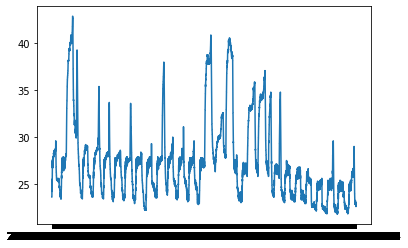

In [6]:
plt.plot(sample['시간'], sample['내부온도관측치'])
plt.show()

In [30]:
sample = pd.read_excel('/content/drive/MyDrive/KIST/red_lettuce/CASE3/dataset_20210703.xlsx')

In [31]:
sample['시간'] = pd.to_datetime(sample['시간'])

In [34]:
sample['년월일'] = sample['시간'].dt.year.astype(str) + sample['시간'].dt.month.astype(str) + sample['시간'].dt.day.astype(str)

In [65]:
sample['년월일'] = pd.to_datetime(sample['년월일'])

In [66]:
case3 = sample.groupby('년월일').mean()

In [67]:
case3

,내부온도관측치,내부습도관측치,CO2관측치,EC관측치,외부온도관측치,외부습도관측치,펌프상태,펌프작동남은시간,최근분무량,일간누적분무량,...,냉방온도,난방온도,기준온도,내외부온도차,난방부하,냉방부하,총추정광량,백색광추정광량,적색광추정광량,청색광추정광량
년월일,,,,,,,,,,,,,,,,,,,,,
2021-07-03,29.451875,59.138264,526.459722,0.0,28.700278,52.681250,3.114754,1.952641,706.550472,5370.577861,...,23.395472,22.395472,22.895472,0.749160,0.000000,35.273714,148.009499,148.009499,0.000000,0.000000
2021-07-04,30.585883,60.282615,522.430459,0.0,29.918776,55.179624,3.051786,1.696429,668.522265,5401.855691,...,23.396995,22.396995,22.896995,0.665618,0.000000,40.933755,148.140697,148.140697,0.000000,0.000000
2021-07-05,30.205694,59.071875,547.809722,0.0,29.564305,52.774653,2.677019,1.581189,719.847972,5035.397694,...,23.393964,22.393964,22.893964,0.643396,0.000000,39.055266,147.926406,147.926406,0.000000,0.000000
2021-07-06,29.726250,60.631042,553.707639,0.0,28.868889,58.933958,2.320604,1.321492,691.516271,4398.731465,...,23.397032,22.397032,22.897032,0.851992,0.000000,36.649467,148.138511,148.138511,0.000000,0.000000
2021-07-07,28.353370,63.108061,589.019458,0.0,27.139263,62.668103,3.552120,2.000883,759.387500,5983.247222,...,23.396213,22.396213,22.896213,1.209224,0.000000,29.792943,148.121297,148.121297,0.000000,0.000000
2021-07-08,29.895106,61.142482,550.949610,0.0,29.316394,57.383180,3.519816,1.830415,745.426256,6276.882127,...,23.314473,22.314473,22.814473,0.583440,0.000000,37.798011,143.020434,143.020434,0.000000,0.000000
2021-07-09,30.122569,59.972986,561.594444,0.0,29.559375,55.635278,2.514745,1.487042,761.667354,5486.595021,...,23.395427,22.395427,22.895427,0.564570,0.000000,38.634445,148.049189,148.049189,0.000000,0.000000
2021-07-10,30.544722,59.110139,543.708333,0.0,30.101944,53.187569,3.748668,1.912966,747.061917,5614.716549,...,23.395703,22.395703,22.895703,0.442977,0.000000,40.749002,147.987632,147.987632,0.000000,0.000000
2021-07-11,30.951041,60.040000,541.665972,0.0,30.461736,55.976111,3.021220,1.733864,669.649361,5673.946611,...,23.395912,22.395912,22.895912,0.489518,0.000000,42.776444,148.084150,148.084150,0.000000,0.000000


In [68]:
case3 = case3.reset_index(drop=True)

In [69]:
case3['target'] = case3.index

In [104]:
case3

,내부온도관측치,내부습도관측치,CO2관측치,EC관측치,외부온도관측치,외부습도관측치,펌프상태,펌프작동남은시간,최근분무량,일간누적분무량,...,난방온도,기준온도,내외부온도차,난방부하,냉방부하,총추정광량,백색광추정광량,적색광추정광량,청색광추정광량,target
0,29.451875,59.138264,526.459722,0.0,28.700278,52.681250,3.114754,1.952641,706.550472,5370.577861,...,22.395472,22.895472,0.749160,0.000000,35.273714,148.009499,148.009499,0.000000,0.000000,0
1,30.585883,60.282615,522.430459,0.0,29.918776,55.179624,3.051786,1.696429,668.522265,5401.855691,...,22.396995,22.896995,0.665618,0.000000,40.933755,148.140697,148.140697,0.000000,0.000000,1
2,30.205694,59.071875,547.809722,0.0,29.564305,52.774653,2.677019,1.581189,719.847972,5035.397694,...,22.393964,22.893964,0.643396,0.000000,39.055266,147.926406,147.926406,0.000000,0.000000,2
3,29.726250,60.631042,553.707639,0.0,28.868889,58.933958,2.320604,1.321492,691.516271,4398.731465,...,22.397032,22.897032,0.851992,0.000000,36.649467,148.138511,148.138511,0.000000,0.000000,3
4,28.353370,63.108061,589.019458,0.0,27.139263,62.668103,3.552120,2.000883,759.387500,5983.247222,...,22.396213,22.896213,1.209224,0.000000,29.792943,148.121297,148.121297,0.000000,0.000000,4
5,29.895106,61.142482,550.949610,0.0,29.316394,57.383180,3.519816,1.830415,745.426256,6276.882127,...,22.314473,22.814473,0.583440,0.000000,37.798011,143.020434,143.020434,0.000000,0.000000,5
6,30.122569,59.972986,561.594444,0.0,29.559375,55.635278,2.514745,1.487042,761.667354,5486.595021,...,22.395427,22.895427,0.564570,0.000000,38.634445,148.049189,148.049189,0.000000,0.000000,6
7,30.544722,59.110139,543.708333,0.0,30.101944,53.187569,3.748668,1.912966,747.061917,5614.716549,...,22.395703,22.895703,0.442977,0.000000,40.749002,147.987632,147.987632,0.000000,0.000000,7
8,30.951041,60.040000,541.665972,0.0,30.461736,55.976111,3.021220,1.733864,669.649361,5673.946611,...,22.395912,22.895912,0.489518,0.000000,42.776444,148.084150,148.084150,0.000000,0.000000,8
9,30.706820,60.353793,553.232591,0.0,30.102925,56.167108,2.494681,1.475177,721.711701,5390.303000,...,22.393861,22.893861,0.600629,0.000000,41.542711,147.919846,147.919846,0.000000,0.000000,9


In [120]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(case3)
case3_scaler = scaler.transform(case3)
case3_scaler = pd.DataFrame(case3_scaler, columns=case3.columns)
case3_scaler

,내부온도관측치,내부습도관측치,CO2관측치,EC관측치,외부온도관측치,외부습도관측치,펌프상태,펌프작동남은시간,최근분무량,일간누적분무량,...,난방온도,기준온도,내외부온도차,난방부하,냉방부하,총추정광량,백색광추정광량,적색광추정광량,청색광추정광량,target
0,0.786260,0.139494,0.600456,0.0,0.692485,0.416146,0.008609,0.275449,0.918543,0.204101,...,0.940514,0.940514,0.521325,0.000000,0.784307,0.992620,0.995388,0.000000,0.000000,0.000000
1,0.947938,0.339100,0.574723,0.0,0.844556,0.562207,0.007926,0.229756,0.862342,0.205708,...,0.946165,0.946165,0.482637,0.000000,0.947025,0.996407,0.997755,0.000000,0.000000,0.037037
2,0.893734,0.127914,0.736810,0.0,0.800317,0.421606,0.003864,0.209205,0.938196,0.186886,...,0.934919,0.934919,0.472346,0.000000,0.893021,0.990221,0.993889,0.000000,0.000000,0.074074
3,0.825378,0.399875,0.774478,0.0,0.713528,0.781693,0.000000,0.162891,0.896324,0.154184,...,0.946300,0.946300,0.568945,0.000000,0.823858,0.996344,0.997715,0.000000,0.000000,0.111111
4,0.629643,0.831936,1.000000,0.0,0.497668,1.000000,0.013350,0.284052,0.996631,0.235570,...,0.943264,0.943264,0.734377,0.000000,0.626742,0.995847,0.997405,0.000000,0.000000,0.148148
5,0.849452,0.489085,0.756863,0.0,0.769377,0.691031,0.013000,0.253651,0.975997,0.250652,...,0.639974,0.639974,0.444581,0.000000,0.856877,0.848603,0.905390,0.000000,0.000000,0.185185
6,0.881882,0.285092,0.824847,0.0,0.799702,0.588845,0.002105,0.192415,1.000000,0.210060,...,0.940345,0.940345,0.435843,0.000000,0.880923,0.993766,0.996104,0.000000,0.000000,0.222222
7,0.942070,0.134588,0.710616,0.0,0.867415,0.445746,0.015481,0.268373,0.978415,0.216641,...,0.941369,0.941369,0.379534,0.000000,0.941714,0.991989,0.994994,0.000000,0.000000,0.259259
8,1.000000,0.296781,0.697572,0.0,0.912318,0.608771,0.007595,0.236433,0.864008,0.219683,...,0.942144,0.942144,0.401086,0.000000,1.000000,0.994775,0.996735,0.000000,0.000000,0.296296
9,0.965181,0.351516,0.771444,0.0,0.867538,0.619937,0.001887,0.190299,0.940950,0.205115,...,0.934534,0.934534,0.452541,0.000000,0.964532,0.990032,0.993771,0.000000,0.000000,0.333333


In [155]:
case3_scaler.corr()

,내부온도관측치,내부습도관측치,CO2관측치,EC관측치,외부온도관측치,외부습도관측치,펌프상태,펌프작동남은시간,최근분무량,일간누적분무량,...,난방온도,기준온도,내외부온도차,난방부하,냉방부하,총추정광량,백색광추정광량,적색광추정광량,청색광추정광량,target
내부온도관측치,1.000000,-0.091477,0.617938,NaN,0.972646,0.341797,0.064669,0.215628,0.405073,0.188743,...,0.126645,0.126811,-0.331609,-0.615757,0.999257,0.379409,0.376500,-0.365795,-0.365885,-0.621524
내부습도관측치,-0.091477,1.000000,-0.228749,NaN,0.073833,-0.000005,0.409949,0.254913,-0.649573,0.285351,...,-0.006319,-0.006683,-0.630934,0.441220,-0.091449,-0.683914,-0.713735,0.727998,0.727910,0.597587
CO2관측치,0.617938,-0.228749,1.000000,NaN,0.527950,0.659932,-0.398923,-0.273695,0.678802,-0.272965,...,0.080860,0.081264,0.091905,-0.381226,0.619000,0.586762,0.600991,-0.602360,-0.602388,-0.759914
EC관측치,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
외부온도관측치,0.972646,0.073833,0.527950,NaN,1.000000,0.205262,0.185805,0.295104,0.229872,0.277282,...,0.125599,0.125652,-0.541649,-0.515356,0.971265,0.192996,0.181775,-0.167012,-0.167104,-0.469143
외부습도관측치,0.341797,-0.000005,0.659932,NaN,0.205262,1.000000,-0.388677,-0.289608,0.532984,-0.321936,...,0.220238,0.220645,0.399602,-0.251765,0.352462,0.550817,0.542228,-0.522563,-0.522595,-0.541723
펌프상태,0.064669,0.409949,-0.398923,NaN,0.185805,-0.388677,1.000000,0.963145,-0.745865,0.971046,...,-0.169294,-0.169147,-0.517235,-0.136700,0.057640,-0.648368,-0.647640,0.633504,0.633231,0.468733
펌프작동남은시간,0.215628,0.254913,-0.273695,NaN,0.295104,-0.289608,0.963145,1.000000,-0.548255,0.989377,...,-0.131614,-0.131327,-0.415455,-0.356134,0.208656,-0.450099,-0.446143,0.433062,0.432754,0.266011
최근분무량,0.405073,-0.649573,0.678802,NaN,0.229872,0.532984,-0.745865,-0.548255,1.000000,-0.588753,...,0.199545,0.199811,0.528798,-0.477771,0.409440,0.927720,0.936574,-0.925732,-0.925643,-0.861043
일간누적분무량,0.188743,0.285351,-0.272965,NaN,0.277282,-0.321936,0.971046,0.989377,-0.588753,1.000000,...,-0.238565,-0.238294,-0.438469,-0.295947,0.177517,-0.524968,-0.507728,0.480409,0.480087,0.314092


In [121]:
df_corr = case3_scaler.corr()['target']

In [122]:
df_corr

내부온도관측치         -0.621524
내부습도관측치          0.597587
CO2관측치          -0.759914
EC관측치                 NaN
외부온도관측치         -0.469143
외부습도관측치         -0.541723
펌프상태             0.468733
펌프작동남은시간         0.266011
최근분무량           -0.861043
일간누적분무량          0.314092
냉방상태            -0.663101
냉방작동남은시간        -0.262352
난방상태             0.557720
난방작동남은시간         0.548057
내부유동팬상태          0.343007
내부유동팬작동남은시간           NaN
외부환기팬상태          0.724294
외부환기팬작동남은시간      0.787695
화이트 LED상태        0.214945
화이트 LED작동남은시간    0.436234
화이트 LED동작강도     -0.841780
레드 LED상태         0.192332
레드 LED작동남은시간     0.449522
레드 LED동작강도       0.846017
블루 LED상태         0.271365
블루 LED작동남은시간     0.446938
블루 LED동작강도       0.845642
카메라상태           -0.297564
냉방온도            -0.166705
난방온도            -0.165891
기준온도            -0.166298
내외부온도차          -0.341302
난방부하             0.623041
냉방부하            -0.625782
총추정광량           -0.839261
백색광추정광량         -0.851017
적색광추정광량          0.844771
청색광추정광량          0.844767
target      

In [123]:
df_corr[abs(df_corr)>=0.3].index

Index(['내부온도관측치', '내부습도관측치', 'CO2관측치', '외부온도관측치', '외부습도관측치', '펌프상태', '최근분무량',
       '일간누적분무량', '냉방상태', '난방상태', '난방작동남은시간', '내부유동팬상태', '외부환기팬상태',
       '외부환기팬작동남은시간', '화이트 LED작동남은시간', '화이트 LED동작강도', '레드 LED작동남은시간',
       '레드 LED동작강도', '블루 LED작동남은시간', '블루 LED동작강도', '내외부온도차', '난방부하', '냉방부하',
       '총추정광량', '백색광추정광량', '적색광추정광량', '청색광추정광량', 'target'],
      dtype='object')

In [174]:
feature = ['내부온도관측치', '내부습도관측치', 'CO2관측치', '외부온도관측치', '외부습도관측치', '최근분무량',
       '일간누적분무량', '화이트 LED동작강도', '레드 LED동작강도', '블루 LED동작강도', '내외부온도차', '난방부하', '냉방부하',
       '총추정광량', '백색광추정광량', '적색광추정광량', '청색광추정광량','target']

In [176]:
df = case3_scaler[feature]

In [177]:
df

,내부온도관측치,내부습도관측치,CO2관측치,외부온도관측치,외부습도관측치,최근분무량,일간누적분무량,화이트 LED동작강도,레드 LED동작강도,블루 LED동작강도,내외부온도차,난방부하,냉방부하,총추정광량,백색광추정광량,적색광추정광량,청색광추정광량,target
0,0.786260,0.139494,0.600456,0.692485,0.416146,0.918543,0.204101,0.950812,0.000000,0.000000,0.521325,0.000000,0.784307,0.992620,0.995388,0.000000,0.000000,0.000000
1,0.947938,0.339100,0.574723,0.844556,0.562207,0.862342,0.205708,1.000000,0.000000,0.000000,0.482637,0.000000,0.947025,0.996407,0.997755,0.000000,0.000000,0.037037
2,0.893734,0.127914,0.736810,0.800317,0.421606,0.938196,0.186886,0.946407,0.000000,0.000000,0.472346,0.000000,0.893021,0.990221,0.993889,0.000000,0.000000,0.074074
3,0.825378,0.399875,0.774478,0.713528,0.781693,0.896324,0.154184,0.947280,0.000000,0.000000,0.568945,0.000000,0.823858,0.996344,0.997715,0.000000,0.000000,0.111111
4,0.629643,0.831936,1.000000,0.497668,1.000000,0.996631,0.235570,0.943627,0.000000,0.000000,0.734377,0.000000,0.626742,0.995847,0.997405,0.000000,0.000000,0.148148
5,0.849452,0.489085,0.756863,0.769377,0.691031,0.975997,0.250652,0.840260,0.000000,0.000000,0.444581,0.000000,0.856877,0.848603,0.905390,0.000000,0.000000,0.185185
6,0.881882,0.285092,0.824847,0.799702,0.588845,1.000000,0.210060,0.923460,0.000000,0.000000,0.435843,0.000000,0.880923,0.993766,0.996104,0.000000,0.000000,0.222222
7,0.942070,0.134588,0.710616,0.867415,0.445746,0.978415,0.216641,0.931924,0.000000,0.000000,0.379534,0.000000,0.941714,0.991989,0.994994,0.000000,0.000000,0.259259
8,1.000000,0.296781,0.697572,0.912318,0.608771,0.864008,0.219683,0.985256,0.000000,0.000000,0.401086,0.000000,1.000000,0.994775,0.996735,0.000000,0.000000,0.296296
9,0.965181,0.351516,0.771444,0.867538,0.619937,0.940950,0.205115,0.960330,0.000000,0.000000,0.452541,0.000000,0.964532,0.990032,0.993771,0.000000,0.000000,0.333333


In [179]:
idx = df[(df['화이트 LED동작강도']==0) | (df['레드 LED동작강도']==0) | (df['블루 LED동작강도']==0)].index
df.drop(idx , inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [180]:
df

,내부온도관측치,내부습도관측치,CO2관측치,외부온도관측치,외부습도관측치,최근분무량,일간누적분무량,화이트 LED동작강도,레드 LED동작강도,블루 LED동작강도,내외부온도차,난방부하,냉방부하,총추정광량,백색광추정광량,적색광추정광량,청색광추정광량,target
16,0.473742,0.293424,0.296838,0.345882,0.522181,0.035642,0.849762,0.975954,0.006243,0.005596,0.800795,0.001119,0.483054,0.818796,0.884463,0.005643,0.005116,0.592593
17,0.449163,0.229282,0.228149,0.368504,0.398204,0.001163,0.897656,0.043427,0.997025,1.000000,0.629322,0.024819,0.443771,0.385463,0.197395,0.995474,0.996659,0.629630
18,0.805673,0.763488,0.265266,0.829793,0.561075,0.000780,0.951535,0.045170,1.000000,0.998684,0.076463,0.000000,0.802616,0.402500,0.206298,1.000000,1.000000,0.666667
19,0.982604,0.749651,0.441093,1.000000,0.500250,0.000000,1.000000,0.038934,0.992148,0.998362,0.019203,0.000000,0.981758,0.386237,0.197710,0.996063,0.996659,0.703704
20,0.814328,0.842656,0.349580,0.823332,0.424452,0.000782,0.943475,0.025040,0.983191,0.986660,0.128216,0.000000,0.811248,0.391845,0.200827,0.997175,0.997175,0.740741
21,0.809885,1.000000,0.212593,0.854016,0.402685,0.001085,0.951842,0.036087,0.987144,0.991418,0.000000,0.000000,0.807957,0.385276,0.197395,0.995621,0.995472,0.777778
23,0.392303,0.534245,0.308571,0.373643,0.212117,0.016428,0.835401,0.040361,0.981516,0.987538,0.450505,0.403768,0.326332,0.000000,0.000000,0.892452,0.892273,0.851852
24,0.070963,0.663096,0.275610,0.079309,0.461948,0.054597,0.015527,0.044219,0.994907,0.994770,0.475162,0.237244,0.065229,0.377788,0.193199,0.994339,0.994610,0.888889
25,0.000000,0.717491,0.354998,0.000000,0.538803,0.051085,0.008155,0.029130,0.987037,0.990906,0.538752,0.884541,0.000000,0.377216,0.193180,0.993342,0.994205,0.925926
26,0.094128,0.809136,0.158913,0.111602,0.458946,0.032424,0.005672,0.025822,0.983374,0.977333,0.433513,1.000000,0.096725,0.378389,0.194539,0.992052,0.992297,0.962963


In [181]:
x = df[feature]
y = df['target']

### 다중공선성

In [159]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [184]:
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(case3_scaler[feature].values, i) for i in range(case3_scaler[feature].shape[1])]
vif["features"] = feature
vif

,VIF Factor,features
0,1.821592e+07,내부온도관측치
1,7.145644e+01,내부습도관측치
2,7.692695e+01,CO2관측치
3,2.090369e+07,외부온도관측치
4,3.545726e+02,외부습도관측치
5,2.174759e+02,최근분무량
6,2.702811e+01,일간누적분무량
7,4.525067e+03,화이트 LED동작강도
8,4.659140e+05,레드 LED동작강도
9,3.371124e+05,블루 LED동작강도


### 모델

In [185]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

In [186]:
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.2)

In [187]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(8, 18) (3, 18) (8,) (3,)


In [191]:
model = LinearRegression()
model.fit(X_train, y_train)
model.score(X_test, y_test)

-0.48193655268627067

In [194]:
y_pred = model.predict(X_test)

In [195]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, y_pred)

0.054605679861474875

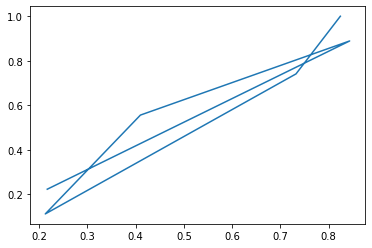

In [154]:
plt.plot(y_pred,y_test)
plt.show()

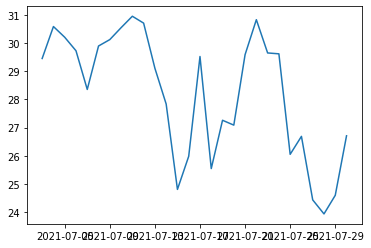

In [45]:
plt.plot(case3['내부온도관측치'])
plt.show()

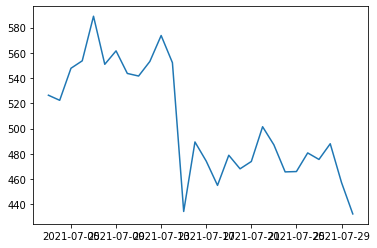

In [51]:
plt.plot(case3['CO2관측치'])
plt.show()

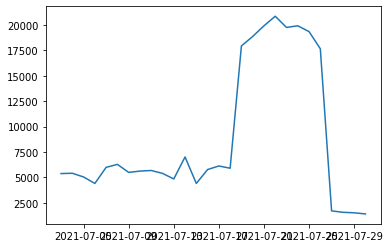

In [54]:
plt.plot(case3['일간누적분무량'])
plt.show()

In [41]:
sample

,시간,내부온도관측치,내부습도관측치,CO2관측치,EC관측치,외부온도관측치,외부습도관측치,펌프상태,펌프작동남은시간,최근분무량,...,난방온도,기준온도,내외부온도차,난방부하,냉방부하,총추정광량,백색광추정광량,적색광추정광량,청색광추정광량,년월일
0,2021-07-03 00:00:00,28.100000,59.900002,535.0,0.0,28.299999,48.700001,0.0,0.0,0.0,...,20.0,20.5,NaN,0.0,40.500002,0.0,0.0,0.0,0.0,2021-07-03
1,2021-07-03 00:01:00,28.200001,57.200001,538.0,0.0,28.299999,48.900002,0.0,0.0,0.0,...,20.0,20.5,-0.199999,0.0,41.000004,0.0,0.0,0.0,0.0,2021-07-03
2,2021-07-03 00:02:00,28.100000,58.200001,540.0,0.0,28.299999,49.000000,0.0,0.0,0.0,...,20.0,20.5,NaN,0.0,40.500002,0.0,0.0,0.0,0.0,2021-07-03
3,2021-07-03 00:03:00,28.100000,58.700001,534.0,0.0,28.299999,48.900002,NaN,NaN,0.0,...,20.0,20.5,NaN,0.0,40.500002,0.0,0.0,0.0,0.0,2021-07-03
4,2021-07-03 00:04:00,28.100000,59.099998,537.0,0.0,28.200001,48.900002,0.0,0.0,0.0,...,20.0,20.5,-0.100000,0.0,40.500002,0.0,0.0,0.0,0.0,2021-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40294,2021-07-30 23:55:00,27.400000,58.599998,449.0,0.0,28.500000,46.400002,NaN,NaN,126.0,...,20.0,20.5,NaN,0.0,36.999998,0.0,0.0,0.0,0.0,2021-07-30
40295,2021-07-30 23:56:00,27.400000,62.900002,451.0,0.0,28.400000,46.299999,0.0,0.0,126.0,...,20.0,20.5,NaN,0.0,36.999998,0.0,0.0,0.0,0.0,2021-07-30
40296,2021-07-30 23:57:00,27.400000,61.700001,451.0,0.0,28.500000,46.500000,NaN,NaN,126.0,...,20.0,20.5,-1.000000,0.0,36.999998,0.0,0.0,0.0,0.0,2021-07-30
40297,2021-07-30 23:58:00,27.500000,59.200001,452.0,0.0,28.500000,46.400002,0.0,0.0,126.0,...,20.0,20.5,0.000000,37.5,0.000000,0.0,0.0,0.0,NaN,2021-07-30
